In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Importo librerias de Scikit Learn
Puntualmente nos interesa importar el modelo de Regresion Lineal, la medida de error cuadratico medio, y el divisor de datos entre train y test.

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV

# Importo dataset de Airbnb 
Desde Airbnb obtenemos el siguiente dataset para entrenar nuestros modelos de regresion http://insideairbnb.com/get-the-data.html (dataset "listings.csv" de London). 

Objetivo: Vamos a querer predecir el precio dadas ciertas features.

In [3]:
pwd

'C:\\Users\\USUARIO\\Desktop\\ANACONDA\\clase_05_master'

In [4]:
# importo el dataset de Airbnb London, lo guardamos en el dataframe "london".
london = pd.read_csv(r'C:\Users\USUARIO\Desktop\ANACONDA\clase_05_master\listings.csv', delimiter=',', parse_dates = True)

In [5]:
# observo la cantidad de renglones y columnas del dataset importado
np.shape(london)

(74186, 16)

In [6]:
# exploro las columnas que tiene el dataframe importado
london.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
#visualizo los primeros 3 renglones de mi dataset
london.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,87,2,192,2020-03-26,1.51,2,236
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,49,1,21,2020-02-22,0.17,3,364
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.68,1,359


In [8]:
# cuento cuantos NaNs tengo por columna
london.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                             9
neighbourhood_group               74186
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20283
reviews_per_month                 20283
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# elimino las rows que tienen NaNs en la columna "reviews_per_month" , que otras opciones existen?
london = london.dropna(subset = ["reviews_per_month"])

In [10]:
# reviso como queda mi dataframe luego de eliminar los renglones con NaNs en review per month
london.shape

(53903, 16)

In [11]:
london.isnull().sum()

id                                    0
name                                  6
host_id                               0
host_name                             2
neighbourhood_group               53903
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Visualización rápida de las features de interes con Pairplot (Seaborn)

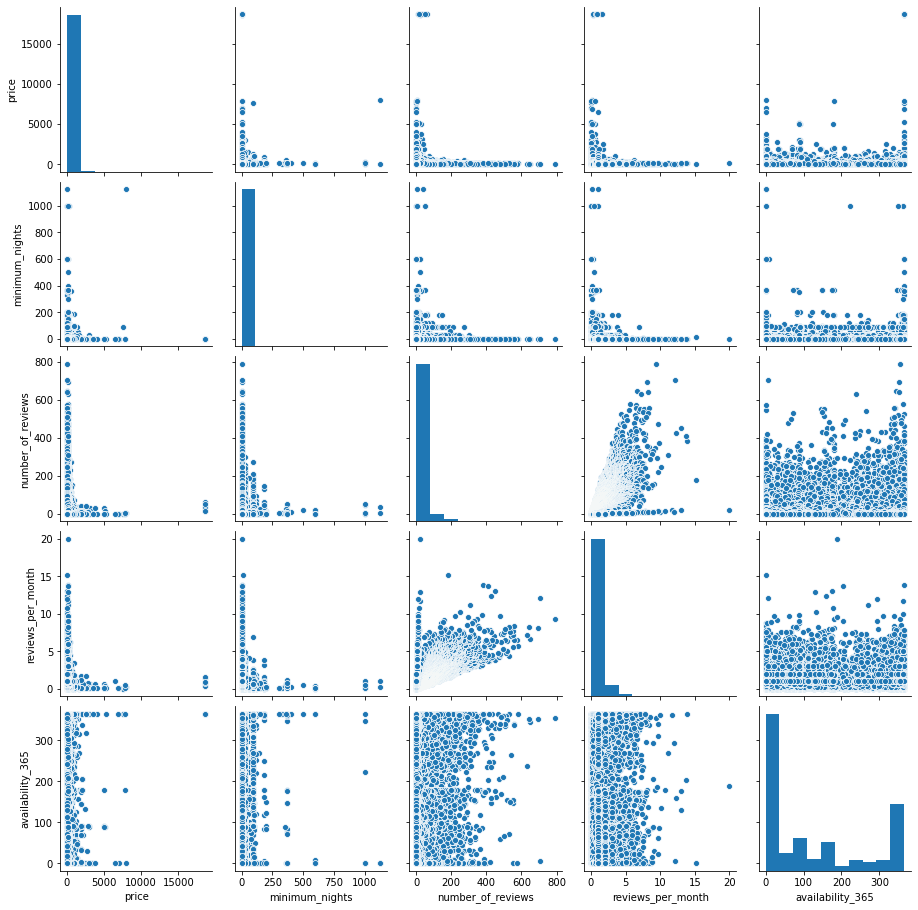

In [12]:
sns.pairplot(london[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]])
plt.show()

## Elimino con .drop las columnas que no son de interes

In [13]:
london = london.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'last_review', 'latitude', 'longitude'], axis=1)
#Que features que eliminamos podrian llegar a ser utiles?

Link util -->
https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c

In [14]:
london.head(2000)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,Entire home/apt,87,2,192,1.51,2,236
1,Islington,Private room,49,1,21,0.17,3,364
2,Kensington and Chelsea,Entire home/apt,75,10,89,0.68,1,359
3,Westminster,Entire home/apt,208,4,42,0.37,14,1
5,Barnet,Private room,29,10,129,1.02,3,1
...,...,...,...,...,...,...,...,...
2336,Hammersmith and Fulham,Private room,57,3,35,0.42,4,363
2337,Ealing,Private room,60,1,8,0.13,1,364
2338,Brent,Private room,30,30,26,0.31,3,209
2339,Brent,Entire home/apt,42,3,4,0.08,1,0


In [15]:
london.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Reviso si los valores máximos de cada feature se condicen con el contexto

Con que objetivo queremos ver esta informacion?

In [16]:
np.max(london)

neighbourhood                     Westminster
room_type                         Shared room
price                                   18638
minimum_nights                           1124
number_of_reviews                         790
reviews_per_month                          20
calculated_host_listings_count            718
availability_365                          365
dtype: object

## Obtengo los percentiles 97 de price y Minimum nights para filtrar outliers de estas features

In [17]:
price_q97 = london.price.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(price_q97))

el cuantil 0.97 de la feature 'price' es = 389.0


In [18]:
min_nights_q97 = london.minimum_nights.quantile(0.975)
print("el cuantil 0.97 de la feature 'minimum_nights' es = " + str(min_nights_q97))

el cuantil 0.97 de la feature 'minimum_nights' es = 21.0


## Outlier Filtering: Filtro mi dataset por los percentiles calculados en el paso anterior bajo las features correspondientes

In [19]:
# aca filtro y conservo los valores que cumplen las dos condiciones al mismo tiempo
london_filt = london.loc[(london.price < price_q97) & (london.minimum_nights < min_nights_q97)]

In [20]:
london_filt.shape

(51151, 8)

In [21]:
london_filt.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,Entire home/apt,87,2,192,1.51,2,236
1,Islington,Private room,49,1,21,0.17,3,364
2,Kensington and Chelsea,Entire home/apt,75,10,89,0.68,1,359
3,Westminster,Entire home/apt,208,4,42,0.37,14,1
5,Barnet,Private room,29,10,129,1.02,3,1


## Feature Engineering: Genero variables dummies para las features categoricas (Neighbourhood y Room Type)

In [22]:
# dummies para la feature "neighbourhood"
neighs_dummie = pd.get_dummies(london_filt.neighbourhood)
neighs_dummie.head(5)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
neighs_dummie.shape

(51151, 33)

In [24]:
# Ejemplo de dummies para la feature "room_type"
room_dummie = pd.get_dummies(london_filt.room_type)
room_dummie.head(3)

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0


In [25]:
room_dummie.shape

(51151, 4)

## Agrego las nuevas variables dummies creadas al dataframe de trabajo 'london_filt'

In [26]:
london_filt = london_filt.join([neighs_dummie, room_dummie])

In [27]:
london_filt.head(3)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Hotel room,Private room,Shared room
0,Lambeth,Entire home/apt,87,2,192,1.51,2,236,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Islington,Private room,49,1,21,0.17,3,364,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Kensington and Chelsea,Entire home/apt,75,10,89,0.68,1,359,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
print("La cantidad de features nuevas agregadas a dataframe son = " + str(np.shape(neighs_dummie)[1]+np.shape(room_dummie)[1]))

La cantidad de features nuevas agregadas a dataframe son = 37


In [29]:
london_filt.shape

(51151, 45)

## Creamos nuestra variable dependiente (label - etiqueta) y

In [30]:
y = np.array(london_filt[["price"]])

## Creamos nuestra variable Independiente X quitando las features que no deseamos

In [31]:
x = london_filt.drop(['price', 'neighbourhood','room_type'], axis=1)

In [32]:
np.shape(x)

(51151, 42)

## Divido el dataset entre Train y Test

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.90, random_state=42)

In [34]:
xtrain.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Hotel room,Private room,Shared room
7201,2,11,0.17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43429,3,17,0.80,37,348,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
29220,3,30,0.88,1,298,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
14787,3,13,0.25,1,22,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24360,3,115,2.89,2,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
xtrain.shape

(5115, 42)

In [36]:
xtest.shape

(46036, 42)

In [37]:
(np.shape(xtrain)[0]+np.shape(xtest)[0])

51151

In [38]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler()

In [39]:
# auto scalo mis muestras de train utilizando el scaler fiteado con el xtrain
xtrain_scal = scaler.transform(xtrain)  

In [40]:
# auto scalo mis muestras de test utilizando el scaler fiteado con el xtrain
xtest_scal = scaler.transform(xtest)  

# Creo un modelo de Regresión Lineal

In [41]:
# 1) creo un modelo generico de regresion lineal
lr = LinearRegression()

In [42]:
# 2) Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain_scal, ytrain)

LinearRegression()

In [43]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test, sin mostrarle las labels (Ytest)
# las predicciones las guardo en el vector "ypred"
ypred = lr.predict(xtest_scal)

In [44]:
np.shape(ypred)

(46036, 1)

In [45]:
# calculo el error de mi modelo con las muestras de train = error de train
np.sqrt(mean_squared_error(ytest, ypred))

50.21873558883225

In [46]:
mean_squared_error(ytest, ypred)

2521.921404141047

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(ytest, ypred)

34.38679341014234

![Inner join](https://i.imgflip.com/1vgxmu.jpg)

## Armar tres modelos de regresion usando:

    -KNN Regression
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros
    parameters_k = np.arange(20,31,5)
    parameters_knn = [{'n_neighbors': parameters_k}]
    
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html?highlight=knn
    
    -SVR
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros:
    ​parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]
    
    -Random Forest regressor
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros:
    'n_estimators': [100, 200, 300, 1000]
    
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.set_params

### Comparar el R2, RMSE, MAE

Competencia

Mayor R2 = { }

Menor RMSE = { }

Menor MAE = { }

In [49]:
#Comienzo relizando KNN regression

In [50]:
knn = KNeighborsRegressor()
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]
n_folds = 5

In [51]:
gs = GridSearchCV(knn, param_grid=parameters_knn, cv=n_folds, refit=True, scoring="neg_mean_squared_error", verbose=3, n_jobs=3)

In [52]:
gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:   12.7s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             scoring='neg_mean_squared_error', verbose=3)

In [53]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

KNeighborsRegressor(n_neighbors=20) 

{'n_neighbors': 20} 

-2614.530855327468 



In [54]:
knn_prediction = gs.best_estimator_.predict(xtest_scal)
knn_r2 = r2_score(y_true=ytest, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=ytest, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=ytest, y_pred=knn_prediction)

R2 score: 0.401858
MAE: 34.255044
MSE: 2568.000746


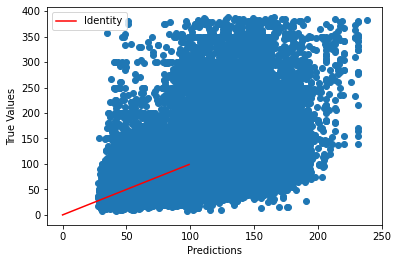

In [55]:
plt.scatter(knn_prediction, ytest)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') 
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

In [56]:
# Luego procedo a SVR

In [57]:
svr = SVR(max_iter=25000)
parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]
gs = GridSearchCV(svr, param_grid=parameters_svr_rbf,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [58]:
gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.2min finished
C:\Users\USUARIO\Anacoda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid=[{'C': [1, 100], 'gamma': [0.1, 0.5],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [59]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=100, gamma=0.1, max_iter=25000) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 

-2772.30500547234 



In [60]:
svr_prediction = gs.best_estimator_.predict(xtest_scal)
svr_r2 = r2_score(y_true=ytest, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_prediction)

R2 score: 0.367750
MAE: 33.164649
MSE: 2714.437684


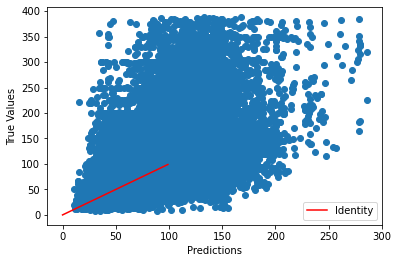

In [62]:
plt.scatter(svr_prediction, ytest)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mae:.6f}')
print(f'MSE: {svr_mse:.6f}')